In [40]:
import pandas as pd
#Obtener datos desde repositorio dedicado a seguimiento de todo lo referente a COVID 19 en Ecuador
df = pd.read_csv('https://raw.githubusercontent.com/andrab/ecuacovid/master/datos_crudos/vacunas/fabricantes.csv')
df

,vaccine,total,arrived_at,contract
0,Pfizer/BioNTech,8190,20/01/2021,Government of Ecuador with Pfizer
1,Pfizer/BioNTech,16380,17/02/2021,Government of Ecuador with Pfizer
2,Pfizer/BioNTech,17550,24/02/2021,Government of Ecuador with Pfizer
3,Pfizer/BioNTech,31590,03/03/2021,Government of Ecuador with Pfizer
4,Sinovac,20000,06/03/2021,Donation from the Government of Chile to the G...
5,Pfizer/BioNTech,73710,10/03/2021,Government of Ecuador with Pfizer
6,Oxford/AstraZeneca,84000,17/03/2021,Government of Ecuador with COVAX
7,Pfizer/BioNTech,62010,17/03/2021,Government of Ecuador with Pfizer
8,Pfizer/BioNTech,65520,24/03/2021,Government of Ecuador with Pfizer
9,Pfizer/BioNTech,66690,31/03/2021,Government of Ecuador with Pfizer


<AxesSubplot:ylabel='vaccine'>

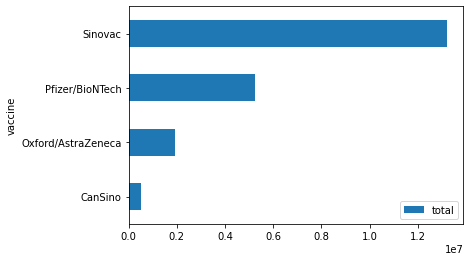

In [42]:
#Vamos a agrupar por marca de vacuna para graficar
df.groupby('vaccine')['total'].sum().plot(kind='barh',legend='reverse')


In [44]:
import plotly.express as px
import matplotlib.pyplot as plt

fig = px.pie(df, values='total', names='vaccine', title='Marcas de vacunas arribadas a Ecuador hasta el momento')
fig.show()

#plt.pie(agrupado["total"], labels=df["vaccine"], autopct="%0.2f %%", pctdistance=.6,textprops={'fontsize': 10},radius=1.5)

In [111]:
#Agrupacion por 2 columnas ordenado por cantidad de forma descendente.
resumen=df.groupby(["vaccine","contract"]).sum('total').sort_values(by=['vaccine','total'], ascending=False)

resumen


total
vaccine            contract                                                    
Sinovac            Government of Ecuador with Sinovac                  11000000
                   Donation from the Government of China to the Go...    200000
                   Donation from the Government of Chile to the Go...     20000
                   Managed by Conmebol and donation by Sinovac             3520
Pfizer/BioNTech    Government of Ecuador with Pfizer                    2882949
                   Donation from United States Government               2000000
                   Government of Ecuador with COVAX                      379080
Oxford/AstraZeneca Government of Ecuador with AstraZeneca               1056000
                   Government of Ecuador with COVAX                      756000
                   Government of Ecuador with COVAX (Spain donated)      101760
CanSino            Government of Ecuador with CanSino                    500000

In [113]:
#cantidad de filas y columnas de matriz, en estecaso 55 filas y 4 columnas
df.shape

(55, 4)

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [4]:
pip install tensorflow


  Using cached tensorflow-2.6.0-cp38-cp38-win_amd64.whl (423.2 MB)


In [7]:
df = pd.read_csv("./creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df = df.drop(['Time'], axis=1)

In [11]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df['Amount'] = std.fit_transform(np.array(df['Amount']).reshape(-1,1))

In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [13]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [15]:
X = np.array(X)
Y = np.array(Y)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.3)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(284807, 29) (199364, 29) (85443, 29)


In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [21]:
model = Sequential()
model.add(Dense(15, input_dim=29, activation='relu'))
model.add(Dense(20, activation='relu'))
Dropout(0.5)
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [23]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)

In [24]:
model.fit(X_train, Y_train, batch_size=7, epochs=10, callbacks=[es_callback], validation_split=0.1, verbose=1)

Epoch 1/10
25633/25633 [==============================] - 44s 2ms/step - loss: 0.0494 - accuracy: 0.9971 - val_loss: 0.0053 - val_accuracy: 0.9987
Epoch 2/10
25633/25633 [==============================] - 26s 1ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.0058 - val_accuracy: 0.9994
Epoch 3/10
25633/25633 [==============================] - 26s 1ms/step - loss: 0.0044 - accuracy: 0.9993 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 4/10
25633/25633 [==============================] - 28s 1ms/step - loss: 0.0041 - accuracy: 0.9994 - val_loss: 0.0043 - val_accuracy: 0.9991
Epoch 5/10
25633/25633 [==============================] - 27s 1ms/step - loss: 0.0040 - accuracy: 0.9994 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 6/10
25633/25633 [==============================] - 25s 979us/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0059 - val_accuracy: 0.9989
Epoch 7/10
25633/25633 [==============================] - 27s 1ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss:

In [32]:
print(model.evaluate(X_test, Y_test))

2671/2671 [==============================] - 1s 501us/step - loss: 0.0040 - accuracy: 0.9993
[0.0039888774044811726, 0.9993094801902771]


In [35]:
X_test

array([[-0.32333357,  1.05745525, -0.04834115, ...,  0.10849443,
         0.16113917, -0.19330595],
       [-0.34971841,  0.93261857,  0.14299204, ...,  0.07683003,
         0.17556196, -0.34531318],
       [-1.61471082, -2.40656973,  0.32619393, ...,  0.2862851 ,
         0.43732187,  0.03058688],
       ...,
       [-1.21539007,  1.37955591,  0.43873221, ...,  0.23435593,
        -0.03533895, -0.12533848],
       [-0.6324385 ,  1.21228401,  1.38818767, ...,  0.34526927,
         0.16841904, -0.32464308],
       [-0.25285457,  1.85402831,  0.14980786, ...,  0.36019629,
         0.20683663, -0.31088966]])